Excuses; Dit bestand is een beetje chaotisch.

In [5]:
# libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import hvplot.pandas

In [2]:
# config file
from configparser import ConfigParser
def read_config(config_file):
    config = ConfigParser()
    config.read(config_file)
    return config


config = read_config("config.ini")
#mulecules_file = config['FILES']['molecules']
data_path = config['FILES']['data']


### 20 november
Download and read data. Clear data (also contains metadata with notebook).

### 21 november
! vertalen naar engels
Het lijkt interessant om te kijken naar de invloed van factoren op depressie. Bijvoorbeeld beweging, slaap kwaliteit of inkomen  (of leeftijd, bmi, etc.). Dat je de factoren kan selecteren die je wilt vergelijken misschien ? Op deze manier kun je kijken wat mensen gelukkiger/ongelukkiger maakt. Met deze informatie kun je concluderen welke factoren je kan verbeteren om vooruitgang te boeken in het welzijn van mensen. \
Of kijken naar corrolatie tussen werkuren en burnout ? \
Maar de vraag is nu hoe we dit gaan visualiseren. \
Of misschien iets doen met verschil tussen T1, T2 en T3 ? \
Nog verder over nadenken de komende dagen.

Voor nu eerst data inladen.


In [3]:
# load the data
data = pd.read_csv(data_path, header = 0)
data.head()


,GENDER,BIRTHYEAR,AGE_T1,AGE_T2,AGE_T3,ZIP_CODE,BMI_T1,WEIGHT_T1,HIP_T1,HEIGHT_T1,...,NSES_YEAR,NSES,NEIGHBOURHOOD1_T2,NEIGHBOURHOOD2_T2,NEIGHBOURHOOD3_T2,NEIGHBOURHOOD4_T2,NEIGHBOURHOOD5_T2,NEIGHBOURHOOD6_T2,MENTAL_DISORDER_T1,MENTAL_DISORDER_T2
0,2,1960,52,55,59,9903,21.9,70.0,91.0,178.5,...,2010,-0.148238,8.0,1.0,3.0,5.0,3.0,4.0,0.0,0.0
1,2,1964,48,51,57,8411,20.9,62.0,93.0,172.5,...,2010,0.357413,10.0,1.0,1.0,1.0,5.0,5.0,0.0,0.0
2,2,1951,58,62,68,9101,24.6,71.0,104.0,170.0,...,2010,-1.730366,9.0,1.0,2.0,2.0,3.0,4.0,0.0,0.0
3,1,1958,54,57,61,9761,25.0,70.5,95.0,169.5,...,2010,0.106612,8.0,2.0,1.0,1.0,5.0,5.0,0.0,0.0
4,2,1963,45,50,57,9201,24.0,61.0,95.0,159.8,...,2006,-1.004381,9.0,4.0,1.0,1.0,5.0,5.0,0.0,0.0


In [4]:
# print limit (not important)

# max amount of rows that the system can print (60)
# if there are more lines: only the header, first 5 and last 5 rows will be printed
print("Max amount of rows:", pd.options.display.max_rows)

# allows more lines to be printed (not necessary)
# pd.options.display.max_rows = 9999

Max amount of rows: 60


## 25 november 
Installed a library: `pip install seaborn` and `pip install seaborn[stats]` to make plots.
For now; getting familair with the library and trying some things out.

## 26 november

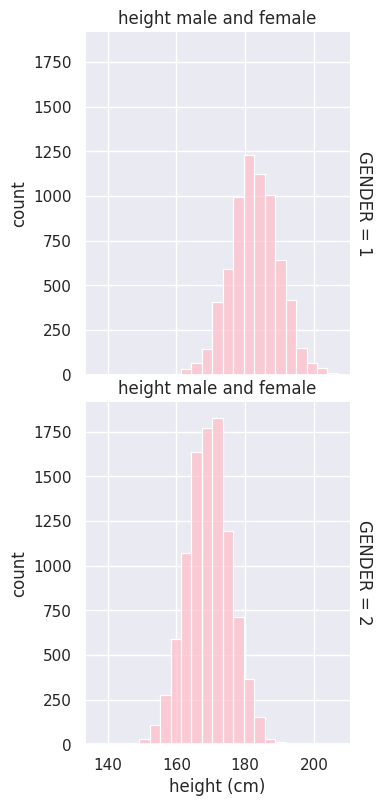

In [ ]:
# trying histogram plot, fail

sns.set_theme(style = "darkgrid")
df = data

# making the plot
plot = sns.displot(
    df, x = "HEIGHT_T1", row = "GENDER",
    binwidth = 3, height = 4, facet_kws = dict(margin_titles = True), color = "pink"
)

# add labels to the axis and title to the plot
plot.set(xlabel = "height (cm)", ylabel = "count", title = 'height male and female')

In this plot is the amount of the heights displayed. One plot for the females and one for the males. The gender=1 is the male gender. gender=2 is the female gender. \
Those labels are a bit unclear. Let's try to improve those.
Maby i can make the female plot pink and the male plot blue. I can't set the colours for each seperate plot. That is probably beacause seaborn thinks these two plots are one in a way.
So let's try to make the two plots seperate so we can adjust the colour for each plot.

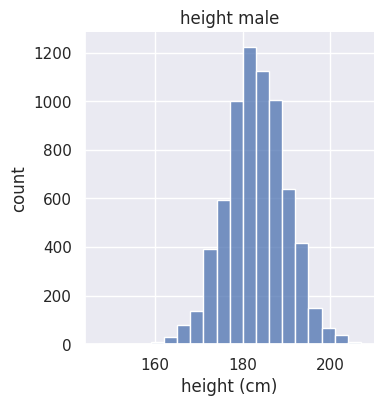

In [ ]:
# trying histogram plot, fail

sns.set_theme(style = "darkgrid")
df = data

male_df = df.loc[df['GENDER'] == 1]

# making the plot
plot_male = sns.displot(
    male_df, x = "HEIGHT_T1",
    binwidth = 3, height = 4
)

# add labels to the axis and title to the plot
plot_male.set(xlabel = "height (cm)", ylabel = "count", title = 'height male')

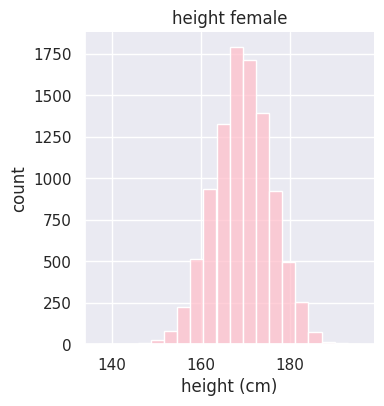

In [ ]:
# trying histogram plot, fail
sns.set_theme(style = "darkgrid")
df = data

female_df = df.loc[df['GENDER'] == 2]

# making the plot
plot_female = sns.displot(
    female_df, x = "HEIGHT_T1",
    binwidth = 3, height = 4, color = "pink"
)

# add labels to the axis and title to the plot
plot_female.set(xlabel = "height (cm)", ylabel = "count", title = 'height female')

The colours are good now. The proportions however are different. Let's try to fix that.

## 27 november

Ramon came up with the idea to make a new colom with the values female and male.

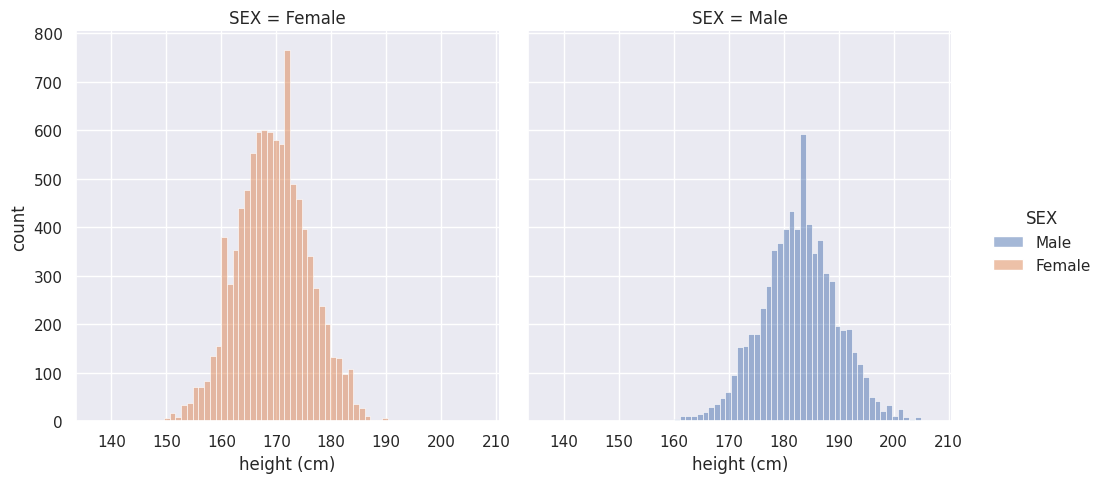

In [ ]:
# height against gender
sns.set_theme(style = "darkgrid")
df = data

# new kolom 'SEX' from 'GENDER'
df["SEX"] = np.where(df["GENDER"] == 1, "Male", "Female")

# this switches the plots so that the female plot is pink and the male plot is blue
hue_order_gender = ["Male", "Female"]

# making the plot
plot = sns.displot(
    df, x = "HEIGHT_T1", col = "SEX",
    hue = "SEX", hue_order = hue_order_gender, col_wrap = None)

# add labels to the axis and title to the plot
plot.set(xlabel = "height (cm)", ylabel = "count")


It seems like there were more female than male participants. The male average height is slightly higher than the female. Now lets make a plot with the colom that will be used for the dashboard (depression). The first colom i want to compare the "DEPRESSION_T1" colom to is pysical activity. The reason for this choice is that specialists usualy say that people with depression should do more physical activity. \
There are multiple coloms with information about physial acticity: SCOR_val, MWK_NO_VAL, SCOR_NO_VAL, SPORTS_T1. The SCOR_VAL contains the most complete picture of physical activity, because it contains the occupational information as well. Next question is which plot to use for these coloms ?

In [9]:
# "DEPRESSION_T1"(0/1) tegen "SCOR_VAL"(float)

# "SCOR_VAL"(float):
# Score for weekly physical activity on moderate and vigorous intensity level,
# based on the sum of minutes per activity times the intensity of the specific
# activity at baseline (T1)

## Workflow:
Gevraagd wat de beste manier is om met de functies om te gaan: \
In logboek zonder functies. Vervolgens een python bestand met alles wat gebruikt wordt maken en daar wel functies in toepassen.

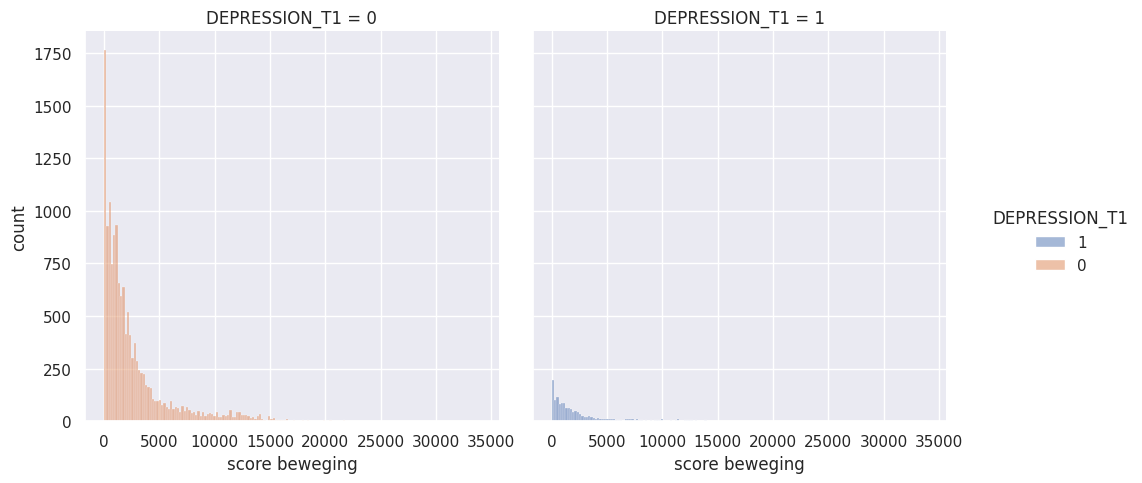

In [15]:
# depression against fysical_activity:
sns.set_theme(style = "darkgrid")
df = data

hue_order_depression = [1, 0]
# new kolom 'SEX' from 'GENDER'
# df["SEX"] = np.where(df["GENDER"] == 1, "Male", "Female")

# this switches the plots so that the female plot is pink and the male plot is blue
# hue_order = ["Male", "Female"]

# making the plot
plot = sns.displot(
    df, x = "SCOR_VAL", col = "DEPRESSION_T1",
    hue = "DEPRESSION_T1", col_wrap = None, hue_order = hue_order_depression)

# add labels to the axis and title to the plot
plot.set(xlabel = "score beweging", ylabel = "count")


The plot still needs to be made prettier and more readable and the proportions are off. Need to fix that first. The y-axis has to be in percentages. \

`Percentage = (alle_count_depression / beweging_count_depression) *100`

## 28 november

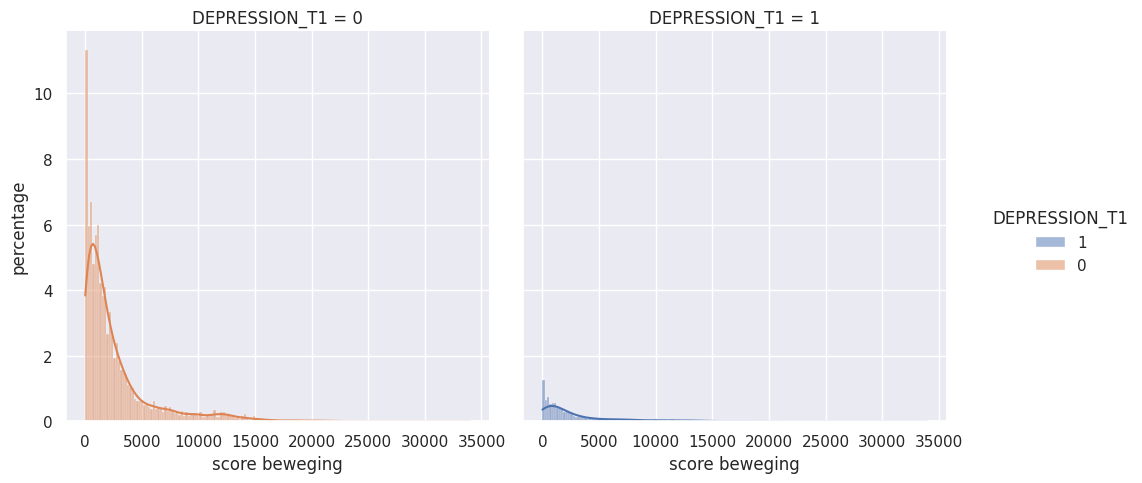

In [ ]:
# depression against fysical_activity:
sns.set_theme(style = "darkgrid")
df = data

# new kolom 'SEX' from 'GENDER'
# df["SEX"] = np.where(df["GENDER"] == 1, "Male", "Female")

# this switches the plots so that the female plot is pink and the male plot is blue
# hue_order = ["Male", "Female"]

# making the plot
plot = sns.displot(
    df, x = "SCOR_VAL", col = "DEPRESSION_T1",
    hue = "DEPRESSION_T1", stat = "percent", kde = True, hue_order = hue_order_depression)

    

# add labels to the axis and title to the plot
plot.set(xlabel = "score beweging", ylabel = "percentage")

It is in percentages now, but there is still a realy big difference. I'm afraid the percentage is of the all the participants and not just per people with depression and people without depression.
So lets make a subgroup. I need a group with people with depresion and a group with people without depression. These subgroups are probably also needed for the dashboard.


let's test if my theory about the proportions is right. 

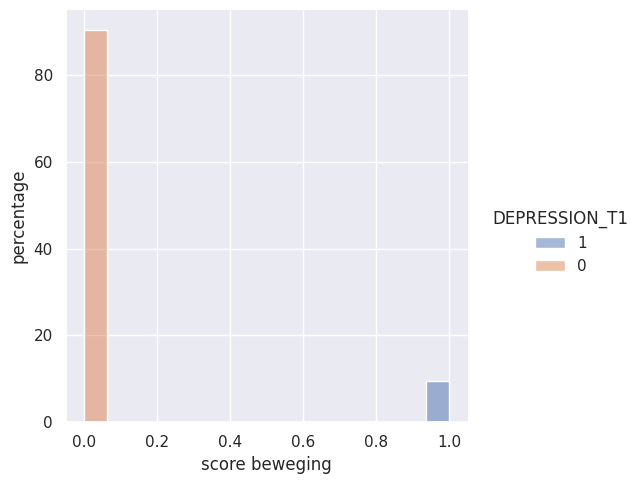

In [ ]:
# testing proportions:
sns.set_theme(style = "darkgrid")
df = data

# making the plot
plot = sns.displot(
    df, x = "DEPRESSION_T1",
    hue = "DEPRESSION_T1", stat = "percent", kde = True, hue_order = hue_order_depression)


# add labels to the axis and title to the plot
plot.set(xlabel = "score beweging", ylabel = "percentage")

In this plot you can see that the total percentage is 100%.

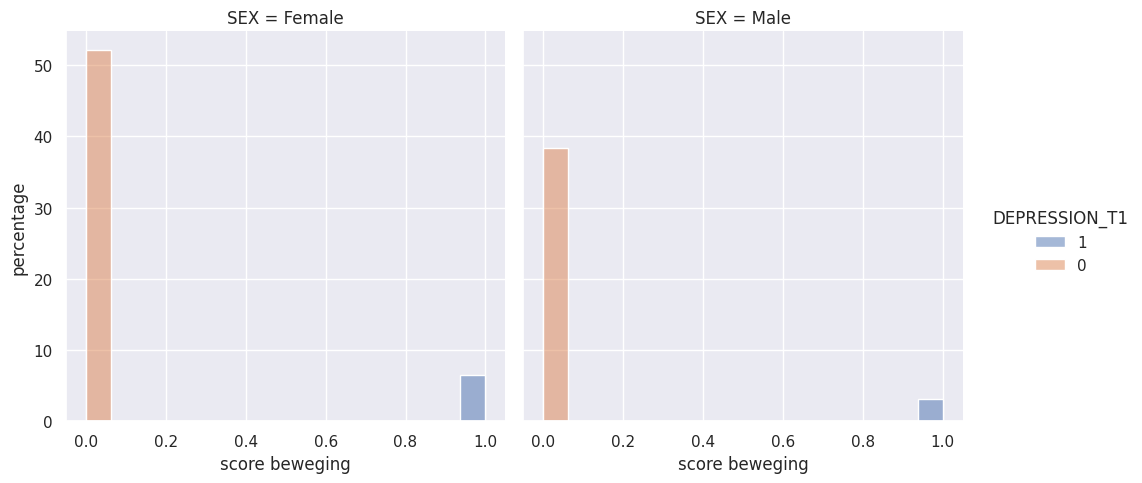

In [ ]:
# testing proportions:
sns.set_theme(style = "darkgrid")

# making the plot
plot = sns.displot(
    data, x = "DEPRESSION_T1", col = "SEX",
    hue = "DEPRESSION_T1", stat = "percent", kde = True, hue_order = hue_order_depression)


# add labels to the axis and title to the plot
plot.set(xlabel = "score beweging", ylabel = "percentage")

In this plot you can see clearer that both plots together are 100%. So my guess was right. The data needs to be split in subsets. One with depression and one without depression.

In [14]:
# subgroups: depression + no_depression ?
# groupby uitzoeken
# df_depression = data.groupby("DEPRESSION_T1")

## 3 december

Let's make the subsets today.

In [15]:
# making a subset depression

# select the right colomn
data_depression = data[(data["DEPRESSION_T1"] == 1)]

data_no_depression = data[(data["DEPRESSION_T1"] == 0)]


In [16]:
data_depression["DEPRESSION_T1"]

6        1
8        1
15       1
23       1
37       1
        ..
16635    1
16640    1
16641    1
16643    1
16670    1
Name: DEPRESSION_T1, Length: 1588, dtype: int64

In [17]:
data_no_depression["DEPRESSION_T1"]


0        0
1        0
2        0
3        0
4        0
        ..
16691    0
16692    0
16693    0
16694    0
16695    0
Name: DEPRESSION_T1, Length: 15108, dtype: int64

The code to make a subset is working now. There are brackets '()' added to the code. Without them the code can't find any people without depression, it is unclear why. Because when u use a true false statement with simelair code, it can only find people without depression. To me it is unclear why it does that, but with the brackets it works. \
The depression subset contains all rows with in the 'DEPRESSION_T1' colomn a one. This equals depression. And the subset with people without depression has zero's in the 'DEPRESSION_T1', which equals no depression. Also the length of the people with no depression is 15108 and the length of people with depression is 1588. This is simulair to the plots before. Because these showed that the people with depression would be around 10% of all the people (and the sum of those is the same as the rows in the full data).


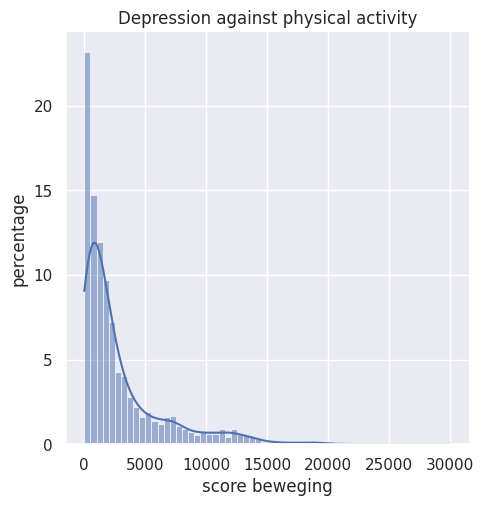

In [18]:
# testing proportions:
sns.set_theme(style="darkgrid")


# making the plot
plot = sns.displot(
    data_depression, x = "SCOR_VAL", stat = "percent", kde = True)

    

# add labels to the axis and title to the plot
plot.set(xlabel = "score beweging", ylabel = "percentage", title = "Depression against physical activity")



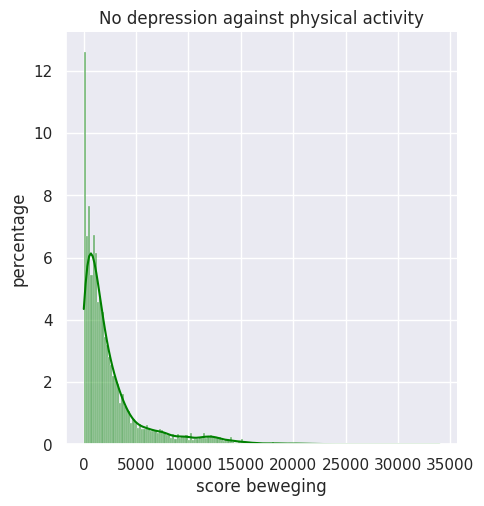

In [19]:
# testing proportions:
sns.set_theme(style="darkgrid")


# making the plot
plot = sns.displot(
    data_no_depression, x = "SCOR_VAL", stat = "percent", kde = True, color="green")

    

# add labels to the axis and title to the plot
plot.set(xlabel = "score beweging", ylabel = "percentage", title = "No depression against physical activity")



Next step is to put the two plots over each other. This way you will be able to see the differences more clear.

## 4 december
Michiel gaf de tip om groupby te gebruiken. Omdat je hierbij behouwd dat de assen hetzelfde blijven. Waardoor de plot betrouwbaarder is en beter af te lezen.
Groupby geprobeerd, maar dat werkt niet zoals ik wil.

## 5 december

In [20]:
depression_grouped_data = data[data["DEPRESSION_T1"]==1]
depression_grouped_data.head()

,GENDER,BIRTHYEAR,AGE_T1,AGE_T2,AGE_T3,ZIP_CODE,BMI_T1,WEIGHT_T1,HIP_T1,HEIGHT_T1,...,NSES,NEIGHBOURHOOD1_T2,NEIGHBOURHOOD2_T2,NEIGHBOURHOOD3_T2,NEIGHBOURHOOD4_T2,NEIGHBOURHOOD5_T2,NEIGHBOURHOOD6_T2,MENTAL_DISORDER_T1,MENTAL_DISORDER_T2,SEX
6,2,1962,50,54,59,9423,25.6,77.5,99.0,174.5,...,-0.954975,9.0,2.0,1.0,1.0,3.0,3.0,0.0,0.0,Female
8,2,1984,26,30,35,9408,21.8,70.0,92.0,179.0,...,1.086562,NaN,NaN,NaN,NaN,NaN,NaN,4.0,0.0,Female
15,2,1953,55,60,66,9213,20.8,61.0,87.0,171.0,...,1.771346,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,Female
23,1,1943,67,70,78,7827,25.5,87.0,97.0,185.5,...,0.410515,10.0,2.0,1.0,1.0,3.0,4.0,0.0,2.0,Male
37,2,1978,32,36,41,9724,27.3,78.5,97.0,168.5,...,-0.724308,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,Female


In [21]:
no_depression_grouped_data = data[data["DEPRESSION_T1"]==0]
no_depression_grouped_data.head()

,GENDER,BIRTHYEAR,AGE_T1,AGE_T2,AGE_T3,ZIP_CODE,BMI_T1,WEIGHT_T1,HIP_T1,HEIGHT_T1,...,NSES,NEIGHBOURHOOD1_T2,NEIGHBOURHOOD2_T2,NEIGHBOURHOOD3_T2,NEIGHBOURHOOD4_T2,NEIGHBOURHOOD5_T2,NEIGHBOURHOOD6_T2,MENTAL_DISORDER_T1,MENTAL_DISORDER_T2,SEX
0,2,1960,52,55,59,9903,21.9,70.0,91.0,178.5,...,-0.148238,8.0,1.0,3.0,5.0,3.0,4.0,0.0,0.0,Female
1,2,1964,48,51,57,8411,20.9,62.0,93.0,172.5,...,0.357413,10.0,1.0,1.0,1.0,5.0,5.0,0.0,0.0,Female
2,2,1951,58,62,68,9101,24.6,71.0,104.0,170.0,...,-1.730366,9.0,1.0,2.0,2.0,3.0,4.0,0.0,0.0,Female
3,1,1958,54,57,61,9761,25.0,70.5,95.0,169.5,...,0.106612,8.0,2.0,1.0,1.0,5.0,5.0,0.0,0.0,Male
4,2,1963,45,50,57,9201,24.0,61.0,95.0,159.8,...,-1.004381,9.0,4.0,1.0,1.0,5.0,5.0,0.0,0.0,Female


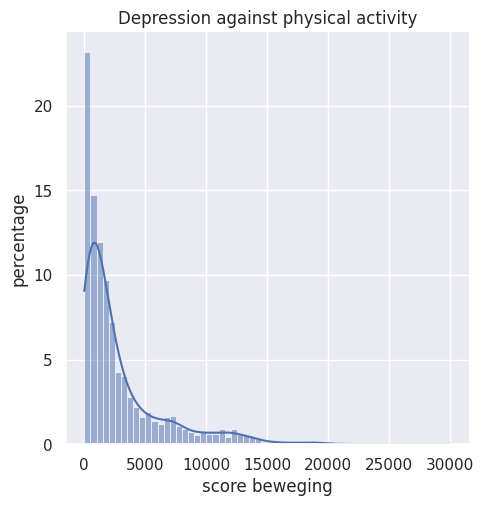

In [22]:
# depression against fysical_activity:
sns.set_theme(style="darkgrid")


# making the plot
plot_physical_activity_1 = sns.displot(
    depression_grouped_data, x = "SCOR_VAL", 
    stat="percent", kde = True)

    

# add labels to the axis and title to the plot
plot_physical_activity_1.set(xlabel = "score beweging", ylabel = "percentage", title = "Depression against physical activity")


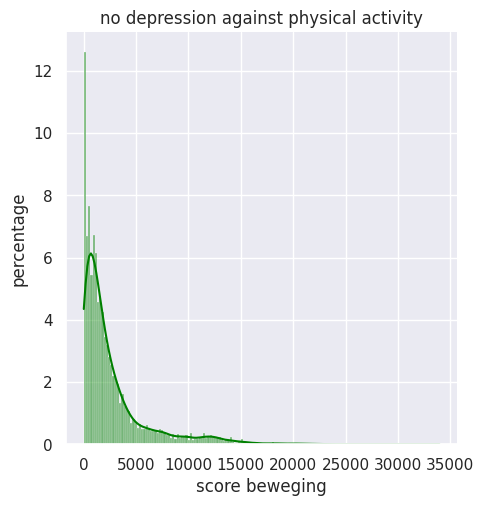

In [23]:
# no depression against fysical_activity:
sns.set_theme(style = "darkgrid")

# making the plot
plot_physical_activity_0 = sns.displot(
    no_depression_grouped_data, x = "SCOR_VAL",
    stat = "percent", kde = True, color = "green")

    

# add labels to the axis and title to the plot
plot_physical_activity_0.set(xlabel = "score beweging", ylabel = "percentage", title = "no depression against physical activity")


## ! je bent hier

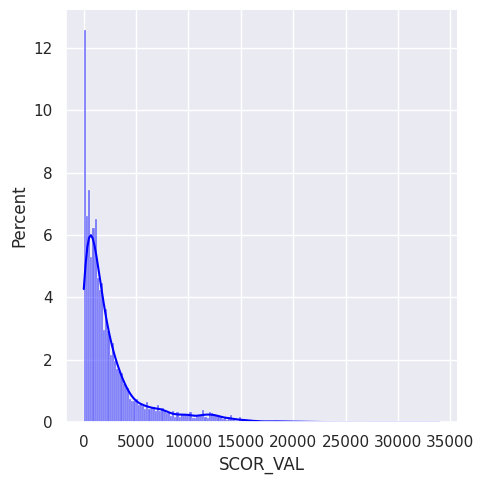

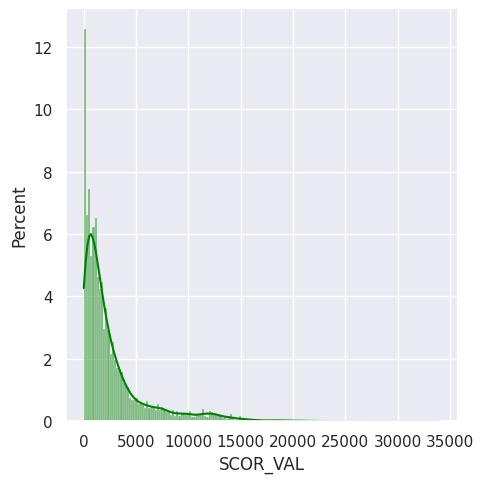

In [24]:
# fail, won't overlap

sns.set_theme(style = "darkgrid")


# Create plot
sns.displot(
    data, x = "SCOR_VAL", 
    stat = "percent", kde = True, color = "blue", zorder = 1)


# Overlay plot
sns.displot(
    data, x="SCOR_VAL",
    stat = "percent", kde = True, color = "green", zorder = 1)


plt.tight_layout()
plt.show()

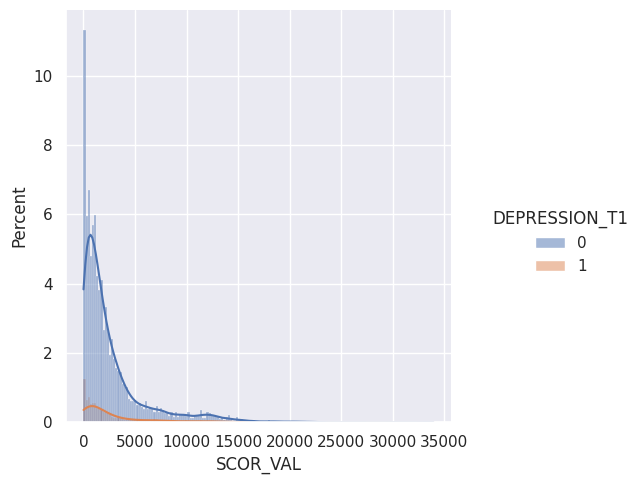

In [25]:
# in one plot, wrong proprtions
sns.displot(
    data, x = "SCOR_VAL",
    stat = "percent", kde = True, color = "blue", hue = "DEPRESSION_T1")

Nu zijn ze wel in een plot, maar kloppen de proporties niet(meer mensen zonder depressie dan met). de volledige dataset is namelijk weer het geheel, en niet de subsets.

OVERLAP: JA \
PROPOPRTIES: NEE

In [26]:
# overlap with facetgrid (for subsets)

# !

## 10 dec
Eerst ff een scatterplot proberen. en dan de proporties proberen te fixen.

<Axes: xlabel='WEIGHT_T1', ylabel='BMI_T1'>

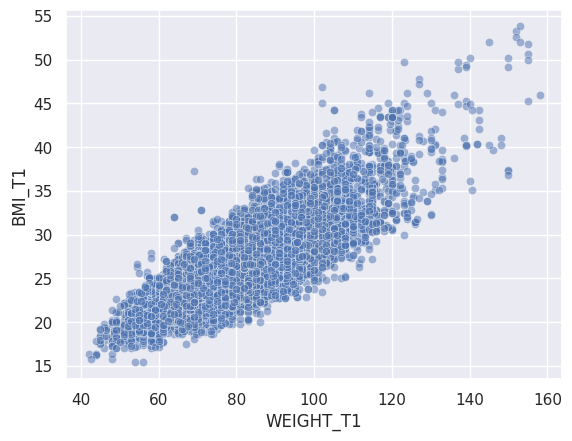

In [27]:
# BMI against SUMOFALCOHOL (depression)

sns.scatterplot(data = data, x = "WEIGHT_T1", y = "BMI_T1", alpha = 0.5)


Je ziet hier dat hoe zwaarder je bent hoe hoger je BMI is. Wat logisch is, aangezien de formule voor BMI is; kg/H². 

Voor het dashboard ook de optie meegeven voor een scatterplot. Dan kan de gebruiker twee kolommen meegeven. (Neem dan hue="DEPRESSION_T1" om nog steeds depressie erbij betrokken te houden).

Laten we beginnen met panel. De vision voor de lay-out van het dashboard is voor nu: Links de keuze of de gebruiker een histogram of een scatterplot wilt. Bij de histogram kan de gebruiker een kolom kiezen en bij de scatterplot 2. Eerst de keuze of je scatter of histogram wilt en als je een kiest krijg je veredre opties te zien ? Of altijd alle instellingen in beeld hebben ? Eerste lijkt me overzichterlijker.

Er is nu een begin van een dashboard met panel. Maar de koppeling tussen variabelen(kolommen) en de plot is nog niet gelukt.

## 11 december
seaborn werkt niet goed samen met panel, vandaar switchen naar hvplot. Hieronder even testen hoe deze library werkt.

In [28]:
import hvplot.pandas

data.hvplot.hist("SCOR_VAL", by = "DEPRESSION_T1", stacked = False)

:NdOverlay   [DEPRESSION_T1]
   :Histogram   [SCOR_VAL]   (Count)

In [29]:
data.hvplot.hist(y = ["SCOR_VAL", "WEIGHT_T1"], bins = 50, alpha = 0.5, height = 400)

:NdOverlay   [Variable]
   :Histogram   [WEIGHT_T1]   (Count)

In [30]:
data.hvplot.hist(y = ["MWK_NO_VAL", "MWK_VAL"], bins = 50, alpha = 0.5, height = 400, by = "DEPRESSION_T1", subplots = True)
# MWK_VAL: 'Minutes of weekly physical activity on moderate and vigorous intensity level at baseline (T1)'
# MWK_NO_VAL: 'Minutes of weekly physical activity on moderate and vigorous intensity level, in leisure time and commuting domains (but not occupational) at baseline (T1)'

:NdLayout   [Variable]
   :Histogram   [MWK_VAL]   (Count)

In [31]:
data.hvplot.hist(y = ["MWK_NO_VAL", "MWK_VAL"], bins = 50, alpha = 0.5, height = 400, subplots = True)
# MWK_VAL: 'Minutes of weekly physical activity on moderate and vigorous intensity level at baseline (T1)'
# MWK_NO_VAL: 'Minutes of weekly physical activity on moderate and vigorous intensity level, in leisure time and commuting domains (but not occupational) at baseline (T1)'

:NdLayout   [Variable]
   :Histogram   [MWK_VAL]   (Count)

In [32]:
# data_depression, data_no_depression

data.hvplot.scatter(y = "SCOR_VAL", x = "WEIGHT_T1", by = "DEPRESSION_T1")
# Mensen met depressie, minder beweging

:NdOverlay   [DEPRESSION_T1]
   :Scatter   [WEIGHT_T1]   (SCOR_VAL)

scatter en histogram met multi-input staat nu op het dashboard. Eigenlijk wil je als je meerdere plotkes hebt de instellingen (widgets) bij de grafieken. Nadenken wat de meest gebruikers vriendelijke lay-out is. Het moet in ieder geval anders dan het nu is. (en de assen moeten waarschijnlijk duidelijker).

## 12 december
Overzicht to do's:
- Scatterplot behouden.
- Histogram proberen overlap van depressief en niet depressief met een kolom. 

Voor de gebruikersvriendelijkheid: 
- Instellingen naast bijbehorende plot
- Misschien uitkiezen of je depressie wilt vervangen voor bv roken of alcohol (zelf alle logische opties selecteren hiervoor)
- Assen duidelijker maken (met dict ? : kolom naam en de leesbare naam voor gebruiker, deze dict gebruiken om de as-labels uit te halen)
- Eventueel laadbalk

Verbeterpuntjes na review: \ 
- `code tussen haken zetten`
- logboek in één taal hebben
- dingen die je vaak gebruikt (layout) in config zetten
- constistend zijn in spatie gebruik om tekens heen
- Readme bijwerken (template voor config op git erbij zetten)

## 16 december
lay out gemaakt zoals ik voor nu wil. \
to do: \
- tabs maken; eentje met plots, eentje met uitleg per kolom (wat t inhoudt, uit metadata)
- scatterplot slidesetting maken voor stip grootte ?
- histogram enkele variable funcctioneel maken

Layout_tryout is gemerged met main.

De groupby kan alleen als het niet dezelfde variabelen heeft bij de histogram. \
! Zorg ervoor dat je niet twee dezelfde variabelen kan kiezen

TO DO:
- tabs maken (intro + metadata)(grafiek 1 + 2)
- readme maken
- hostingplan schrijven
- unit tests maken

HISTOGRAM NORMALISEREN PROBEREN:

In [6]:
data.hvplot.hist(y = 'SCOR_VAL', by = 'DEPRESSION_T1')


:NdOverlay   [DEPRESSION_T1]
   :Histogram   [SCOR_VAL]   (Count)

In [13]:
# data.hvplot.hist(y = 'SCOR_VAL', by = 'DEPRESSION_T1')

male = data.query('GENDER == 1')
female = data.query('GENDER == 2')

# len_totaal = print(len(data))
len_1 = (len(male)) # geheel
len_2 = print(len(female)) # geheel

# deel


# alles/depressie * 100
# alles/geen_depressie * 100

6917
9779
16696
